In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data_dir = os.path.join('.', 'data')

In [3]:
def remove_parens(x):
    return x[1:-1]

In [17]:
def load_data(filename):
    return pd.read_csv(os.path.join(data_dir, filename))

In [16]:
drive = load_data('drive.csv')
drive = drive.loc[drive.start_field.notna() & drive.start_field.notnull()]
drive.start_field = drive.start_field.astype(str).apply(remove_parens).astype(int)
drive.end_field = drive.end_field.astype(str).apply(remove_parens).astype(int)
drive['ended_in_opposing_territory'] = drive.end_field > 0
drive = drive.set_index('drive_id')
drive.head()

,gsis_id,start_field,start_time,end_field,end_time,pos_team,pos_time,first_downs,result,penalty_yards,yards_gained,play_count,time_inserted,time_updated,ended_in_opposing_territory
drive_id,,,,,,,,,,,,,,,
1,2009081350,-30,"(Q1,0)",-11,"(Q1,239)",PIT,(239),1,Punt,4,15,6,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,False
2,2009081350,-35,"(Q1,239)",7,"(Q1,526)",ARI,(287),3,Punt,0,42,10,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True
3,2009081350,-42,"(Q1,526)",-14,"(Q1,870)",PIT,(344),2,Punt,-5,33,8,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,False
4,2009081350,-29,"(Q1,870)",11,"(Q2,244)",ARI,(274),3,Punt,0,40,10,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True
5,2009081350,-39,"(Q2,244)",18,"(Q2,437)",PIT,(193),1,Field Goal,-5,62,6,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True


In [35]:
game = load_data('game.csv')
game['away_win'] = game.away_score > game.home_score
game['home_win'] = game.home_score > game.away_score
game['turnover_differential'] = game.home_turnovers - game.away_turnovers
game = game.set_index('gsis_id')
game.head()

,gamekey,start_time,week,day_of_week,season_year,season_type,finished,home_team,home_score,home_score_q1,...,away_score_q2,away_score_q3,away_score_q4,away_score_q5,away_turnovers,time_inserted,time_updated,away_win,home_win,turnover_differential
gsis_id,,,,,,,,,,,,,,,,,,,,,
2014122106,56403,2014-12-21 13:00:00-05,16,Sunday,2014,Regular,t,PIT,20,3,...,3,0,6,0,0,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,False,True,0
2015102500,56595,2015-10-25 09:30:00-04,7,Sunday,2015,Regular,t,JAC,34,0,...,10,0,18,0,0,2015-10-25 19:28:34.570797-04,2015-10-28 02:59:49.506824-04,False,True,1
2014122107,56404,2014-12-21 13:00:00-05,16,Sunday,2014,Regular,t,TB,3,0,...,3,0,10,0,2,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,True,False,0
2014122108,56405,2014-12-21 16:05:00-05,16,Sunday,2014,Regular,t,STL,27,3,...,10,14,3,0,1,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,True,False,-1
2014122109,56406,2014-12-21 16:25:00-05,16,Sunday,2014,Regular,t,DAL,42,14,...,0,0,7,0,2,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,False,True,1


In [19]:
agg_play = load_data('agg_play.csv')
agg_play = agg_play.set_index(['gsis_id', 'play_id'])
agg_play.head()

,,drive_id,defense_ast,defense_ffum,defense_fgblk,defense_frec,defense_frec_tds,defense_frec_yds,defense_int,defense_int_tds,defense_int_yds,...,receiving_yac_yds,receiving_yds,rushing_att,rushing_loss,rushing_loss_yds,rushing_tds,rushing_twopta,rushing_twoptm,rushing_twoptmissed,rushing_yds
gsis_id,play_id,,,,,,,,,,,,,,,,,,,,,
2015092707,36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092703,36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092800,4074,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092708,36,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015091000,836,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
game_drive = game.merge(drive, left_index=True, right_on='gsis_id')

features = ['turnover_differential', 'avg_start_field', 'penalty_yds']

grouped_game_drive = game_drive.groupby(['gsis_id'])
mean_start_field = grouped_game_drive['start_field'].mean()
penalty_yards = grouped_game_drive['penalty_yards'].sum()
turnover_differential = grouped_game_drive['turnover_differential'].first()
home_win = grouped_game_drive['home_win'].first()

agg_game_drive = pd.concat([mean_start_field, penalty_yards, turnover_differential, home_win], axis=1)
agg_game_drive.home_win = agg_game_drive.home_win.astype(int)
agg_game_drive.head()

,start_field,penalty_yards,turnover_differential,home_win
gsis_id,,,,
2009080950,-21.727273,-42,2,1
2009081350,-20.260870,9,2,1
2009081351,-22.318182,58,-1,0
2009081352,-22.541667,-78,0,1
2009081353,-22.500000,18,2,1


In [100]:
x = StandardScaler().fit_transform(agg_game_drive, ['start_field', 'penalty_yards', 'turnover_differential'])
y = agg_game_drive.loc[:, 'home_win']
y = pd.DataFrame(y).reset_index().drop('gsis_id', axis=1)
y.head()

,home_win
0,1
1,1
2,0
3,1
4,1


# PCA to determine if the information selected adequately explains wins vs losses

The graph below will be well-segmented if the features (starting field position, penalty yards, and turnover differential) carry enough
information to predict wins vs losses of a NFL game.

In [112]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

principal['home_win'] = y['home_win']

home_losses = principal.loc[principal.home_win == 0]
home_wins = principal.loc[principal.home_win == 1]

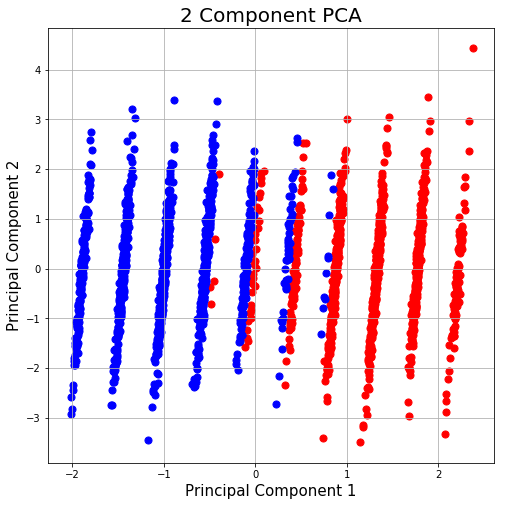

In [113]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(home_losses.loc[:, 'principal component 1']
               , home_losses.loc[:, 'principal component 2']
               , c = 'r'
               , s = 50)
ax.scatter(home_wins.loc[:, 'principal component 1']
               , home_wins.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()

# Analysis

The dots in blue are home wins.
The dots in red are home losses.

The two classes are well-separated meaning that the features chosen do explain home wins vs losses well.

In [61]:
df = pd.read_csv(os.path.join('.', 'data', 'top_qbs_passing_tds.csv'))
df['heightweight'] = df.height / df.weight
df.head()

,min,first_name,last_name,height,weight,years_pro,college,position,passing_tds,heightweight
0,00-0020531,Drew,Brees,72,209,16,Purdue,QB,295,0.344498
1,00-0019596,Tom,Brady,76,225,17,Michigan,QB,279,0.337778
2,00-0023459,Aaron,Rodgers,74,225,12,California,QB,274,0.328889
3,00-0010346,Peyton,Manning,77,230,18,Tennessee,UNK,235,0.334783
4,00-0022942,Philip,Rivers,77,228,13,North Carolina State,QB,217,0.337719


In [39]:
features = ['heightweight', 'years_pro']
x = df.loc[:, features]

In [40]:
y = df.loc[:, 'passing_tds']

In [41]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=features)
x.head()

,heightweight,years_pro
0,1.018202,1.463324
1,0.430715,1.689146
2,-0.346404,0.560038
3,0.168860,1.914968
4,0.425603,0.785859


In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.314749,1.754704
1,-0.889845,1.498968
2,-0.640951,0.151062
3,-1.234685,1.473489
4,-0.254740,0.856633


In [43]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,passing_tds
0,-0.314749,1.754704,295
1,-0.889845,1.498968,279
2,-0.640951,0.151062,274
3,-1.234685,1.473489,235
4,-0.254740,0.856633,217


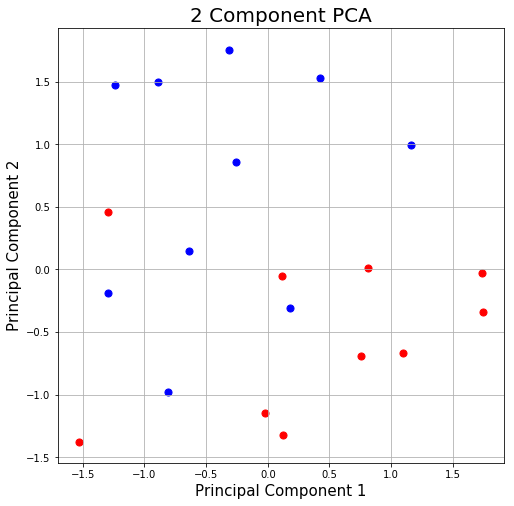

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


bottom = finalDf.loc[:, 'passing_tds'].quantile(0.2)
top = finalDf.loc[:, 'passing_tds'].quantile(0.8)

bottomDf = finalDf.loc[finalDf.passing_tds <= bottom]
midDf = finalDf.loc[(finalDf.passing_tds > bottom) & (finalDf.passing_tds <= top)]
topDf = finalDf.loc[finalDf.passing_tds > top]

ax.scatter(bottomDf.loc[:, 'principal component 1']
               , bottomDf.loc[:, 'principal component 2']
               , c = 'r'
               , s = 50)
ax.scatter(topDf.loc[:, 'principal component 1']
               , topDf.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()